#### Fonction à utiliser qu'une fois : déplace toutes les images dans le même répertoire

In [108]:
import dicom
import pylab
import os

INPUT_FOLDER = '/home/lucsoret/Projet/Supelec/CEI/Data/Images/sample_images'
patients = os.listdir(INPUT_FOLDER)

"""

base_dir = "/home/lucsoret/Projet/Supelec/CEI/Data/Images/Small"
target_dir = "/home/lucsoret/Projet/Supelec/CEI/Data/Images/small_dataset"
images_dir = os.listdir(base_dir)

for i,clef in enumerate(images_dir):
        path_ds = os.path.join(base_dir,images_dir[i])
        print(path_ds)
        ds_dcm = os.listdir(path_ds)
        for j,clef in enumerate(path_ds):
            full_path = os.path.join(path_ds,ds_dcm[j])
            target_path = os.path.join(target_dir,ds_dcm[j])
            os.rename(full_path,target_path)"""

            

'\n\nbase_dir = "/home/lucsoret/Projet/Supelec/CEI/Data/Images/Small"\ntarget_dir = "/home/lucsoret/Projet/Supelec/CEI/Data/Images/small_dataset"\nimages_dir = os.listdir(base_dir)\n\nfor i,clef in enumerate(images_dir):\n        path_ds = os.path.join(base_dir,images_dir[i])\n        print(path_ds)\n        ds_dcm = os.listdir(path_ds)\n        for j,clef in enumerate(path_ds):\n            full_path = os.path.join(path_ds,ds_dcm[j])\n            target_path = os.path.join(target_dir,ds_dcm[j])\n            os.rename(full_path,target_path)'

#### Ok, toutes nos images sont dans le dossier small_dataset

In [109]:
import dicom
import pylab
import os
import numpy as np



def load_scan(path):
    slices = [dicom.read_file(path + '/' + s) for s in os.listdir(path)]
    return slices





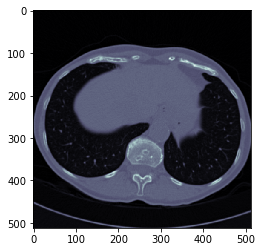

In [123]:
first_patient_path = os.path.join(INPUT_FOLDER,patients[0])
first_patient = load_scan(first_patient_path)
total_images = os.listdir(first_patient_path)


ds=dicom.read_file(os.path.join(first_patient_path,total_images[0]))
pylab.imshow(ds.pixel_array, cmap=pylab.cm.bone)
pylab.show()


In [124]:
print(ds)

(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0016) SOP Class UID                       UI: CT Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.3.6.1.4.1.14519.5.2.1.7009.9004.329717298280022717093290522834
(0008, 0060) Modality                            CS: 'CT'
(0008, 103e) Series Description                  LO: 'Axial'
(0010, 0010) Patient's Name                      PN: '0acbebb8d463b4b9ca88cf38431aac69'
(0010, 0020) Patient ID                          LO: '0acbebb8d463b4b9ca88cf38431aac69'
(0010, 0030) Patient's Birth Date                DA: '19000101'
(0018, 0060) KVP                                 DS: ''
(0020, 000d) Study Instance UID                  UI: 2.25.66234994940093060530875882673593880723182397297085825139120
(0020, 000e) Series Instance UID                 UI: 2.25.27985737130106072918310533525688877208529713445697698517643
(0020, 0011) Series Number                       IS: '4'
(0020, 0012) Acquisition Number       

Nos données sont en Pixel Data. Ce n'est pas l'unité canonique de la CT, celle-ci étant plutôt __HounsfieldUnit (HU)__ . Pas de panique, une simple transformation affine permet de retomber sur cette unité, qui permet alors de savoir si on est plutôt sur des os, du tissus, etc...

In [138]:
def get_pixels_hu(slices):
    image = np.stack([s.pixel_array for s in slices])

    image = image.astype(np.int16)
    
    # Convertion en HU
    for slice_number in range(len(slices)):
        
        intercept = slices[slice_number].RescaleIntercept
        slope = slices[slice_number].RescaleSlope
        
        image[slice_number] = slope * image[slice_number].astype(np.float64)
        image[slice_number] = image[slice_number].astype(np.int16)
            
        image[slice_number] += np.int16(intercept)
    
    return np.array(image, dtype=np.int16)

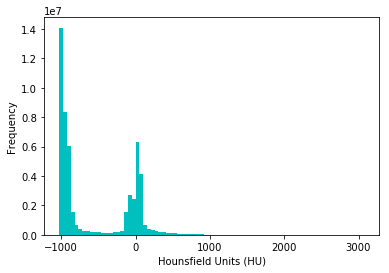

In [142]:
import matplotlib.pyplot as plt

first_patient = load_scan(os.path.join(INPUT_FOLDER ,patients[0]))
first_patient_pixels = get_pixels_hu(first_patient)
plt.hist(first_patient_pixels.flatten(), bins=80, color='c')
plt.xlabel("Hounsfield Units (HU)")
plt.ylabel("Frequency")
plt.show()